In [51]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
path = "C:\\Jehyeon\\Crypto_paper\\crypto_paper\\ryu_new_progress\\coinmarketcap_data\\2013-2023"
data_dict = {}

for file in os.listdir(path):
    name = file[11:-7]
    data_dict[name] = pd.read_pickle(path+"\\"+file)

In [25]:
data_dict["close"].reset_index()

,time_open,1,2,3,4,5,6,8,10,13,...,10206,10216,10523,10835,10957,11091,12555,14804,14935,15198
0,2013-04-28,134.210007,4.348400,1.107230,0.646892,0.386525,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29,144.539993,4.383900,1.328320,0.709691,0.408861,4.665750,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30,139.000000,4.296490,1.501200,0.674150,0.375300,4.314560,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01,116.989998,3.801010,1.213190,0.568572,0.322892,3.684020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02,105.209999,3.371980,1.068930,0.527102,0.278807,3.296230,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2023-04-12,29892.988700,92.136437,1.520779,0.011936,0.465610,0.031991,0.003944,0.001495,0.030646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3637,2023-04-13,30399.066385,94.259499,1.463622,0.012069,0.478798,0.039521,0.003826,0.001520,0.031161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3638,2023-04-14,30485.700029,96.451976,1.468830,0.011517,0.487722,0.053651,0.003661,0.003048,0.036580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3639,2023-04-15,30318.496953,96.868210,1.464349,0.011166,0.502939,0.052166,0.003651,0.003033,0.033514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
sample_melt = pd.melt(data_dict["close"].reset_index() ,
                id_vars=["time_open"])

In [57]:
sample_melt

,time_open,variable,value
0,2013-04-28,1,134.210007
1,2013-04-29,1,144.539993
2,2013-04-30,1,139.000000
3,2013-05-01,1,116.989998
4,2013-05-02,1,105.209999
...,...,...,...
39388333,2023-04-12,15198,NaN
39388334,2023-04-13,15198,NaN
39388335,2023-04-14,15198,NaN
39388336,2023-04-15,15198,NaN


In [33]:
drop = melt.dropna().reset_index(drop=True)

In [48]:
drop

,time_open,variable,value
0,2013-04-28,1,134.210007
1,2013-04-29,1,144.539993
2,2013-04-30,1,139.000000
3,2013-05-01,1,116.989998
4,2013-05-02,1,105.209999
...,...,...,...
5894788,2023-04-16,24457,0.328432
5894789,2023-04-15,24461,0.000003
5894790,2023-04-16,24461,0.000011
5894791,2023-04-15,24462,0.055312


In [39]:
re_pivot = pd.pivot_table(drop, 
               values="value",
               index="time_open",
               columns="variable")

In [45]:
re_pivot.columns = re_pivot.columns.astype("int64")

In [46]:
re_pivot.sort_index(axis=1)

variable,1,2,3,4,5,6,7,8,10,12,...,24447,24448,24449,24450,24451,24452,24453,24457,24461,24462
time_open,,,,,,,,,,,,,,,,,,,,,
2013-04-28,134.210007,4.348400,1.107230,0.646892,0.386525,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,144.539993,4.383900,1.328320,0.709691,0.408861,4.665750,0.000374,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,139.000000,4.296490,1.501200,0.674150,0.375300,4.314560,0.000341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,116.989998,3.801010,1.213190,0.568572,0.322892,3.684020,0.000284,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,105.209999,3.371980,1.068930,0.527102,0.278807,3.296230,0.000255,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12,29892.988700,92.136437,1.520779,0.011936,0.465610,0.031991,NaN,0.003944,0.001495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-13,30399.066385,94.259499,1.463622,0.012069,0.478798,0.039521,NaN,0.003826,0.001520,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-14,30485.700029,96.451976,1.468830,0.011517,0.487722,0.053651,NaN,0.003661,0.003048,NaN,...,0.123424,0.014109,0.000044,71.809210,0.000320,NaN,NaN,NaN,NaN,NaN


다 합쳐보자

In [54]:
data_dict.keys()

dict_keys(['close', 'high', 'low', 'mktcap', 'open', 'timehigh', 'timelow', 'vol'])

In [65]:
melt = pd.DataFrame(index=range(0,39388338), 
                    columns=["time_open","coin","close","high","low","mktcap","open","timehigh","timelow","vol"])
melt["time_open"] = sample_melt.time_open
melt["coin"] = sample_melt.variable

In [70]:
melt

,time_open,coin,close,high,low,mktcap,open,timehigh,timelow,vol
0,2013-04-28,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
39388333,2023-04-12,15198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39388334,2023-04-13,15198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39388335,2023-04-14,15198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39388336,2023-04-15,15198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data_dict.keys()

dict_keys(['close', 'high', 'low', 'mktcap', 'open', 'timehigh', 'timelow', 'vol'])

In [72]:
for key in tqdm(data_dict.keys()):
    some_melt = pd.melt(data_dict[key].reset_index(),
                        id_vars=["time_open"]).value
    melt[key] = some_melt

100%|██████████| 8/8 [00:33<00:00,  4.23s/it]


In [76]:
melt_drop = melt.dropna(thresh=4)

In [106]:
melt_drop.columns = ['date', 'coin_id', 'close', 
                     'high', 'low', 'mktcap', 'open',
                     'timehigh', 'timelow', 'vol']

In [109]:
melt_drop[["date","coin_id","open","high","low","close","vol","mktcap","timehigh","timelow"]].to_pickle("coinmarketcap_data.pickle")

In [95]:
p = pd.pivot_table(melt_drop,
               index="date",
               columns="coin_key",
               values="close")

In [98]:
p.columns = p.columns.astype("int64")
p = p.sort_index(axis=1)

In [99]:
p

coin_key,1,2,3,4,5,6,7,8,10,12,...,24447,24448,24449,24450,24451,24452,24453,24457,24461,24462
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,134.210007,4.348400,1.107230,0.646892,0.386525,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,144.539993,4.383900,1.328320,0.709691,0.408861,4.665750,0.000374,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,139.000000,4.296490,1.501200,0.674150,0.375300,4.314560,0.000341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,116.989998,3.801010,1.213190,0.568572,0.322892,3.684020,0.000284,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,105.209999,3.371980,1.068930,0.527102,0.278807,3.296230,0.000255,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12,29892.988700,92.136437,1.520779,0.011936,0.465610,0.031991,NaN,0.003944,0.001495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-13,30399.066385,94.259499,1.463622,0.012069,0.478798,0.039521,NaN,0.003826,0.001520,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-14,30485.700029,96.451976,1.468830,0.011517,0.487722,0.053651,NaN,0.003661,0.003048,NaN,...,0.123424,0.014109,0.000044,71.809210,0.000320,NaN,NaN,NaN,NaN,NaN


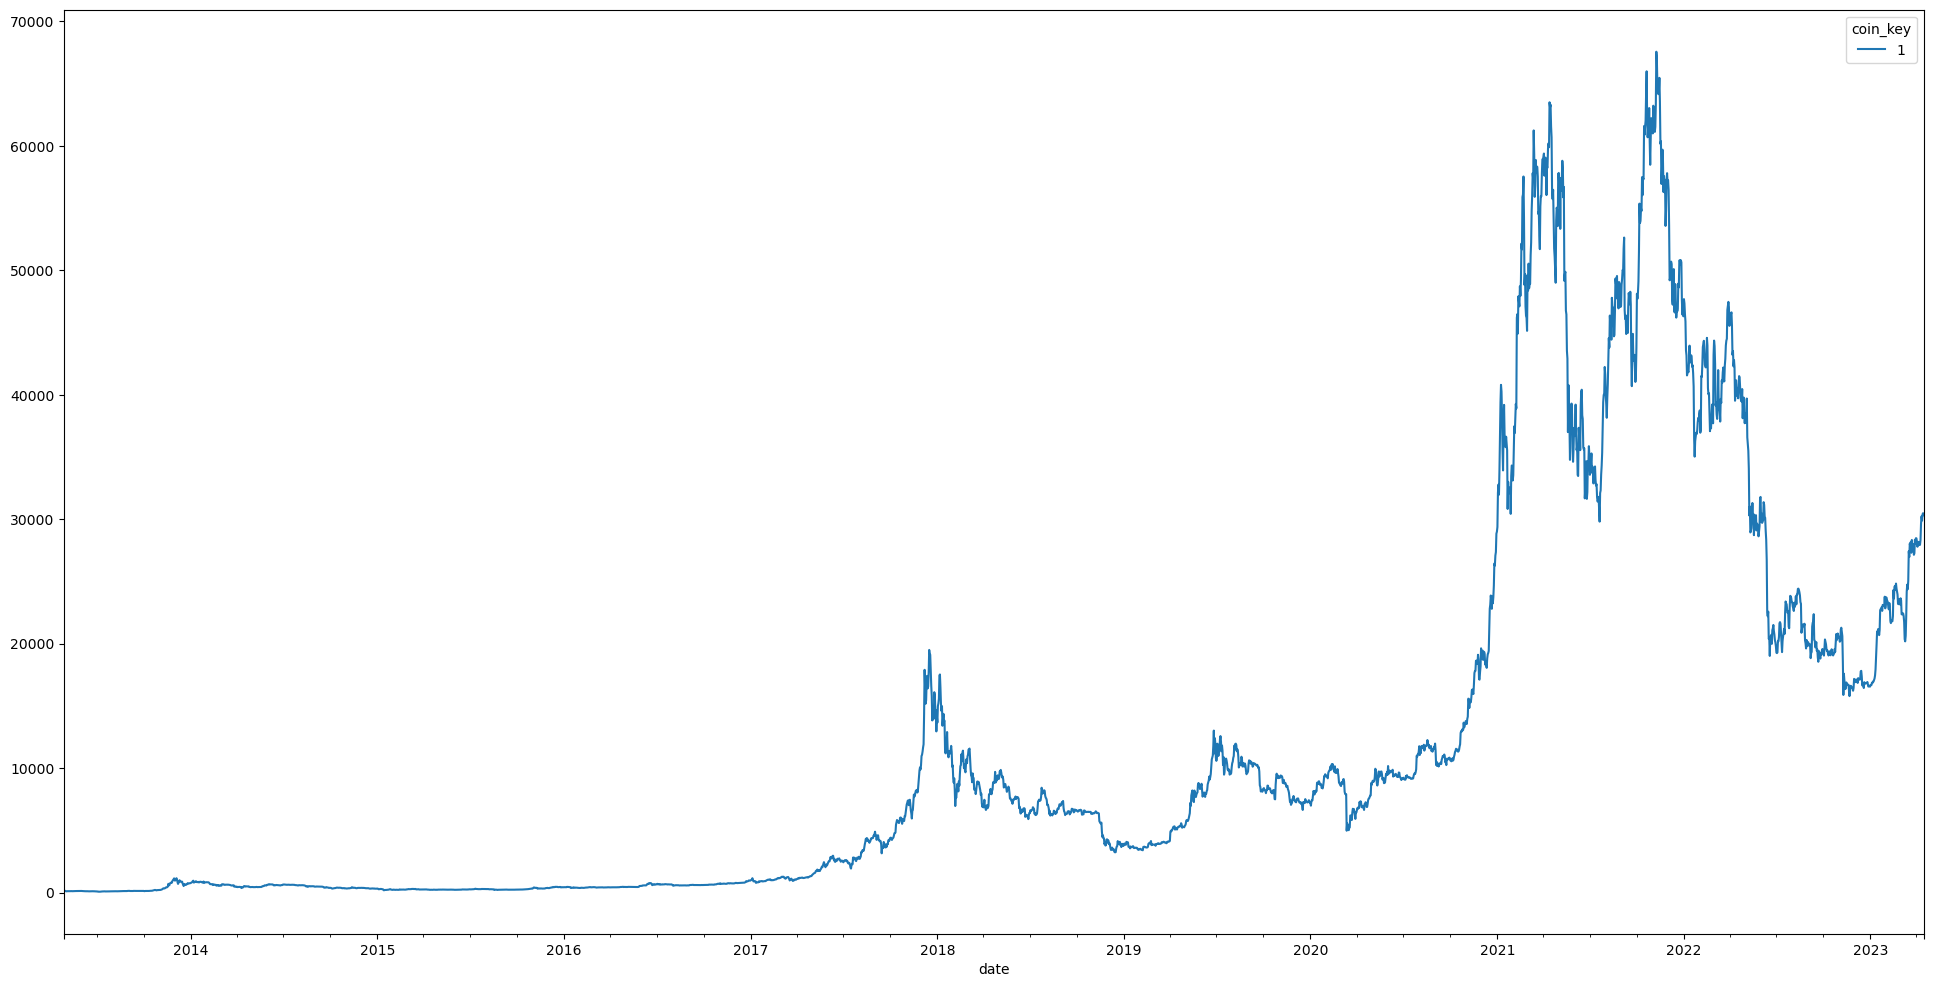

In [101]:
p[[1]].plot(figsize=(24,12));